In [103]:
from hw2skeleton.agglomerative import *
from hw2skeleton import io
import matplotlib.pyplot as plt
import sklearn.metrics as sk
from sklearn.decomposition import PCA

In [65]:
def make_cluster_assign_df(clusters, simMat):
    assgn = pd.DataFrame(index = simMat.index, columns = ['Cluster Assignment'])
    for cluster in clusters.keys():
        for site in clusters[cluster]:
            assgn.loc[site] = cluster
    return assgn

In [87]:
def run_everything(k, simMat_update):
    c = 0
    clusters = {}
    while len(simMat_update) > k:
        new_name = name_cluster(c)
        c += 1
        min_pair=find_min(simMat_update)
        clust_sites = unpack_cluster(min_pair, sites_dict, clusters)
        simMat_update = rm_most_similar(simMat_update, min_pair)
        new_clust_avg = compute_cluster_center(clust_sites, sites_dict, aa_df)
        newSim = compute_new_cluster_sim(new_clust_avg, simMat_update, sites_dict, clusters)
        simMat_update = update_simMat(newSim, simMat_update, new_name)
        clusters = update_cluster_dict(new_name, min_pair, clusters, sites_dict)
    return clusters

In [88]:
sites = io.read_active_sites('data')
sites_dict = {}
for site in sites:
    sites_dict[site.name] = site
simMat_update = simMat.copy()

Read in 136 active sites


In [91]:
c = run_everything(2, simMat_update)

In [93]:
assgn = make_cluster_assign_df(c, simMat)

In [97]:
sk.silhouette_score(simMat, assgn['Cluster Assignment'], metric='precomputed')

0.7209463983067482

In [98]:
def make_repr_data_frame(sites):
    df = pd.DataFrame(index = aa3, columns = simMat.columns )
    for site in sites:
        df[site.name] = site.counts
    return df

In [104]:
a = make_repr_data_frame(sites).T
pca = PCA(n_components=2)
p = pca.fit_transform(a)
principalDf = pd.DataFrame(data = p
             , columns = ['principal component 1', 'principal component 2'], index = simMat.index)
finalDf = pd.concat([principalDf, assgn[['Cluster Assignment']]], axis = 1)



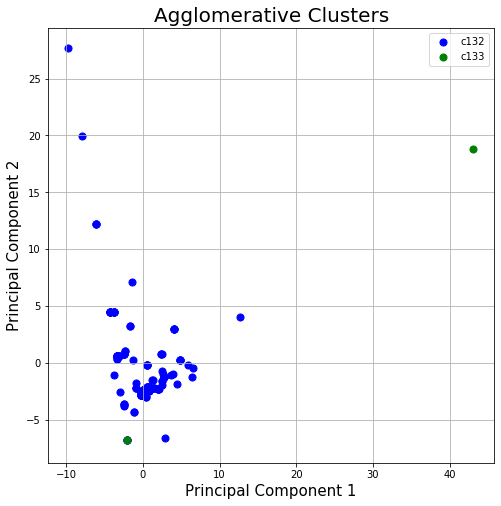

In [106]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Agglomerative Clusters', fontsize = 20)
targets = c.keys()
colors = ['b', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Cluster Assignment'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()